### Dataset : oasis_longitudinal and oasis_cross-sectional

#### 📘 About the Dataset:
This project utilizes the Open Access Series of Imaging Studies (OASIS) dataset, specifically combining the cross-sectional and longitudinal collections. This dataset is a valuable resource for studying brain aging and dementia.

- **`oasis_cross-sectional.csv`**: Contains data from 416 subjects aged 18 to 96, including demographic information and clinical assessments.
- **`oasis_longitudinal.csv`**: Contains data from 150 subjects aged 60 to 96, with repeated MRI scans and clinical assessments over time.

By combining these, we create a comprehensive dataset to analyze factors related to dementia.

#### 🗃️ Technical Details:

- **File Format:** CSV
- **Combined Records:** 804 (after initial concatenation and cleaning)
- **Age Range:** 18 to 98
- **Key Clinical Assessments:** CDR (Clinical Dementia Rating), MMSE (Mini-Mental State Examination), nWBV (Normalized Whole Brain Volume), ASF (Atlas Scaling Factor).

## 🔑 Key Features:

### 👤 Demographic & Clinical
- `M/F`: Gender (Male/Female)
- `Age`: Age of the subject
- `Educ`: Years of education
- `SES`: Socioeconomic Status
- `MMSE`: Mini-Mental State Examination score (a measure of cognitive impairment)
- `CDR`: Clinical Dementia Rating (0 = No Dementia, 0.5 = Very Mild, 1 = Mild, 2 = Moderate)

### 🧠 MRI-Derived Brain Metrics
- `eTIV`: Estimated Total Intracranial Volume
- `nWBV`: Normalized Whole Brain Volume
- `ASF`: Atlas Scaling Factor

### 📌 Target Variable
- `Group`: The clinical diagnosis, categorized as:
    - `Nondemented`: No signs of dementia.
    - `Demented`: Diagnosed with dementia.
    - `Converted`: Initially nondemented but later diagnosed with dementia (in the longitudinal study). For this analysis, 'Converted' is merged into the 'Demented' group to create a binary classification problem.

---

# Libraries

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Dataset Analysis

DATASET OVERVIEW
Dataset Shape: (809, 17)
Total Records: 809
Total Features: 17

Column Names:
0: ID
1: M/F
2: Hand
3: Age
4: Educ
5: SES
6: MMSE
7: CDR
8: eTIV
9: nWBV
10: ASF
11: Delay
12: Subject ID
13: MRI ID
14: Group
15: Visit
16: MR Delay

First 5 rows of the dataset:
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay Subject ID MRI ID Group  Visit  MR Delay  
0    NaN        NaN    NaN   NaN    NaN       NaN  
1    NaN        NaN    NaN   NaN    NaN       NaN  
2    NaN        NaN    NaN   NaN    NaN       NaN  
3    NaN        NaN    NaN   NaN    NaN       NaN  
4    Na

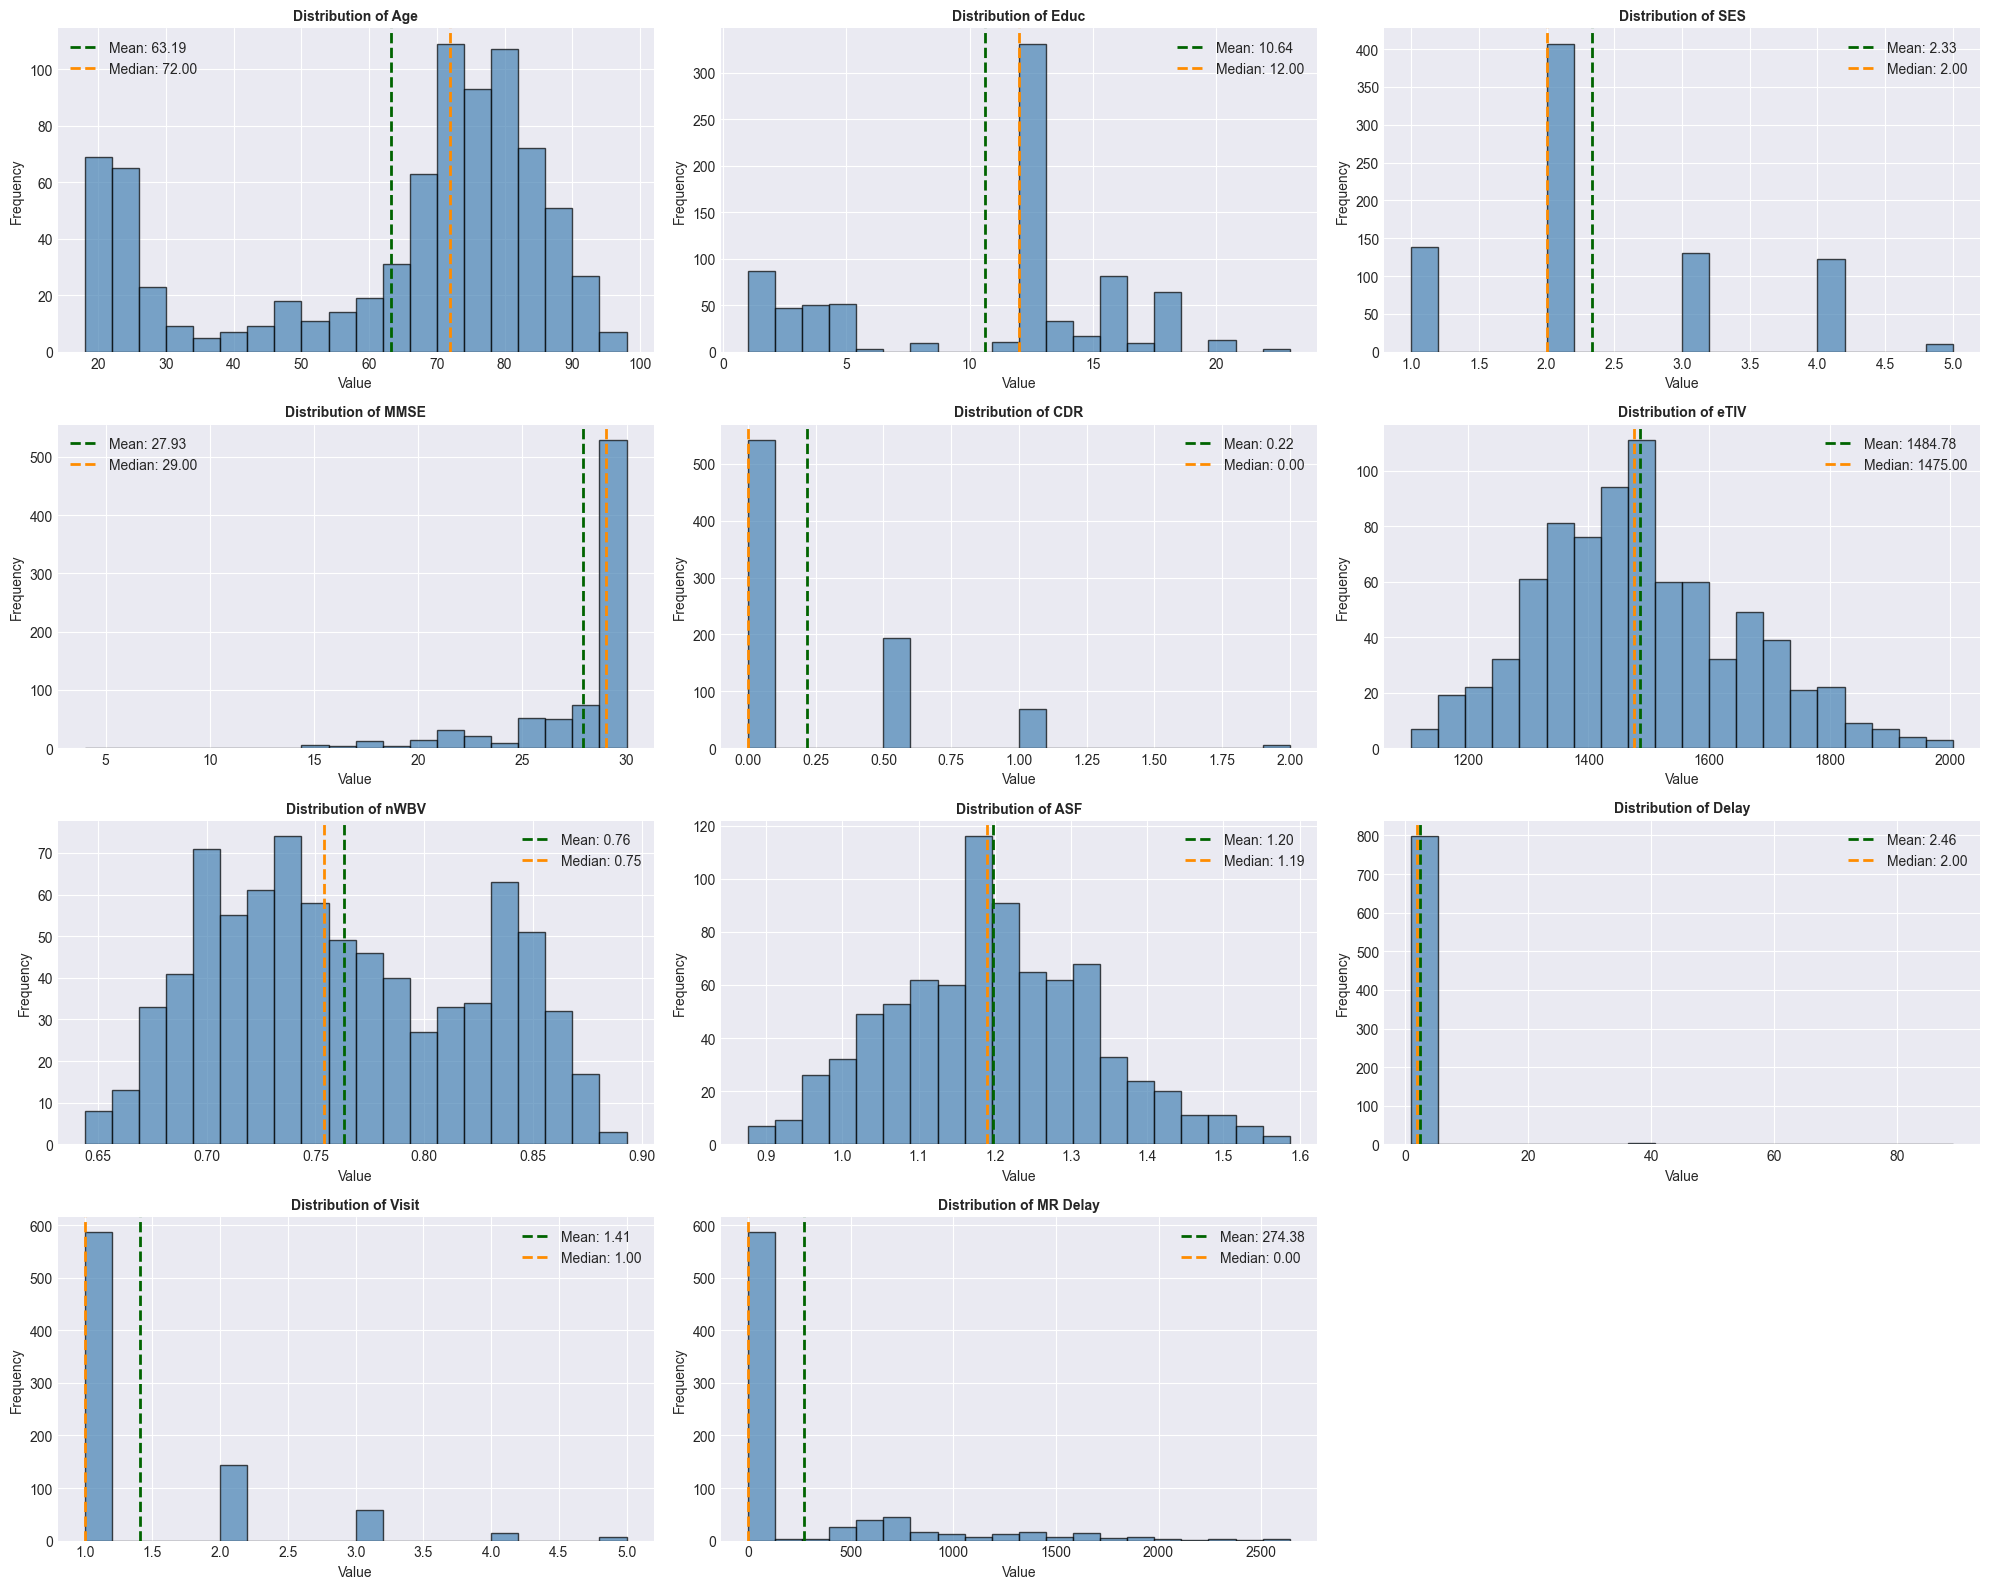


Skewness of Numeric Features:
Delay       13.203565
Visit        2.118467
MR Delay     2.054784
CDR          1.740293
SES          0.620443
eTIV         0.396964
nWBV         0.206536
ASF          0.179243
Educ        -0.384351
Age         -0.870887
MMSE        -2.438253
dtype: float64

TARGET VARIABLE ANALYSIS ('Group')
Initial distribution of the target variable:
Group
Nondemented    626
Demented       146
Converted       37
Name: count, dtype: int64
----------------------------------------
Simplifying target variable: 'Converted' will be merged into 'Demented'.


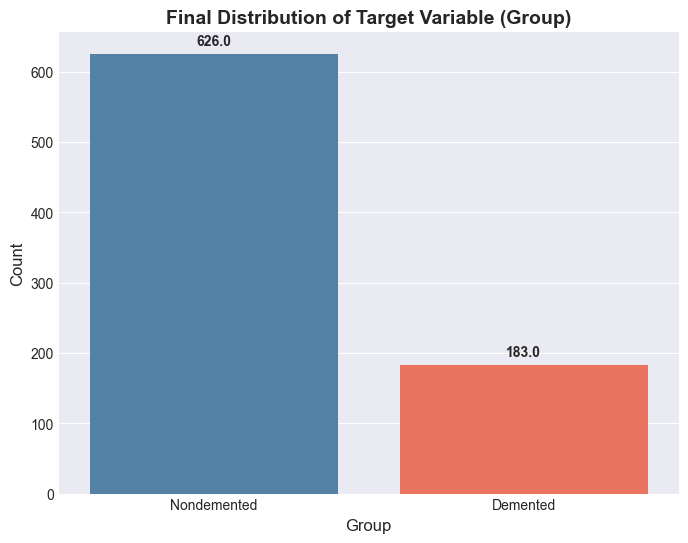


Final distribution of the target variable:
Group
Nondemented    626
Demented       183
Name: count, dtype: int64

Percentage Distribution:
Group
Nondemented    77.38
Demented       22.62
Name: count, dtype: float64

Plot saved to: Analysis/plots\target_variable_distribution.png

CORRELATION ANALYSIS


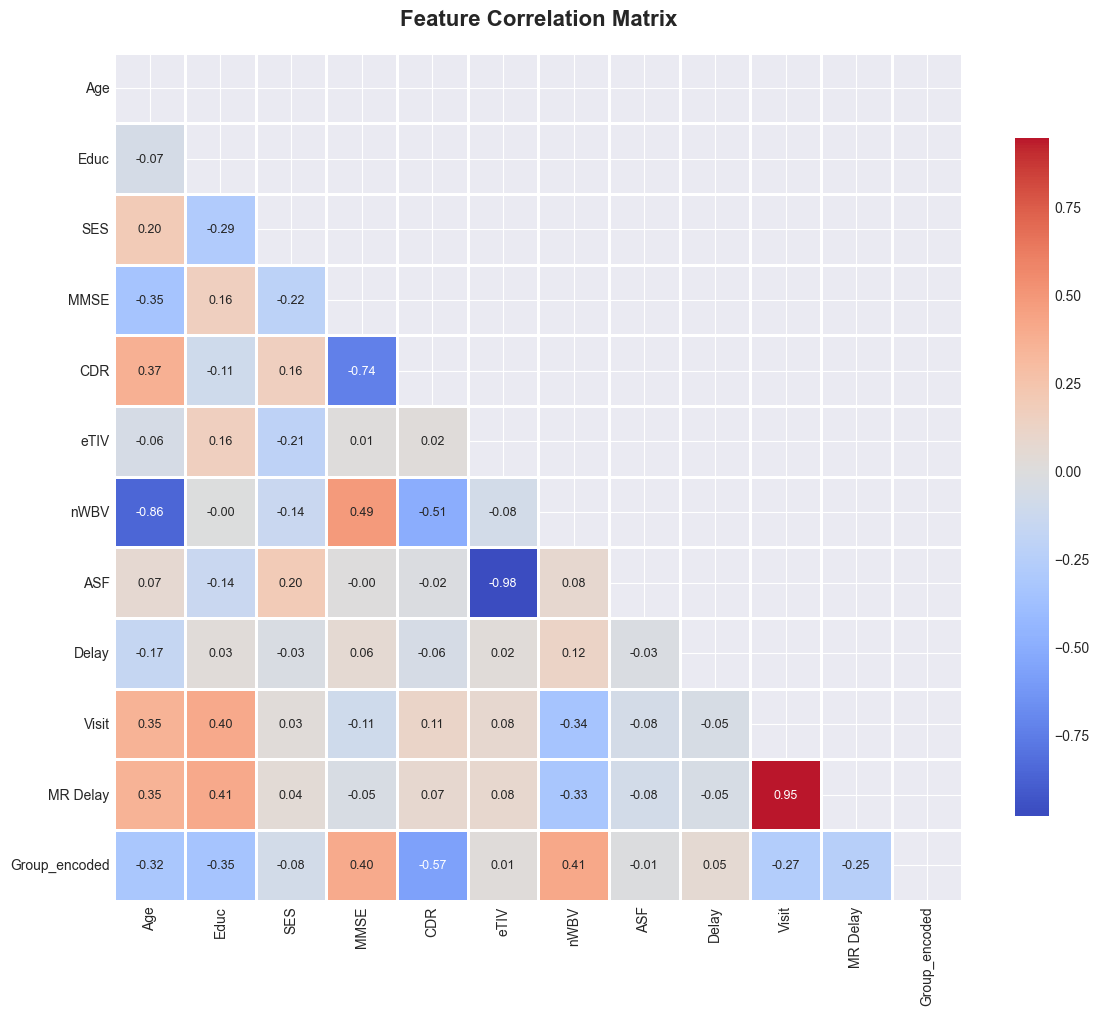

Correlation matrix heatmap saved to: Analysis/plots\correlation_matrix.png

Feature Correlations with Dementia Group (1=Demented, 0=Nondemented):
nWBV        0.411983
MMSE        0.398778
Delay       0.053264
eTIV        0.013960
ASF        -0.011045
SES        -0.082679
MR Delay   -0.250839
Visit      -0.272653
Age        -0.322502
Educ       -0.346188
CDR        -0.572124
Name: Group_encoded, dtype: float64


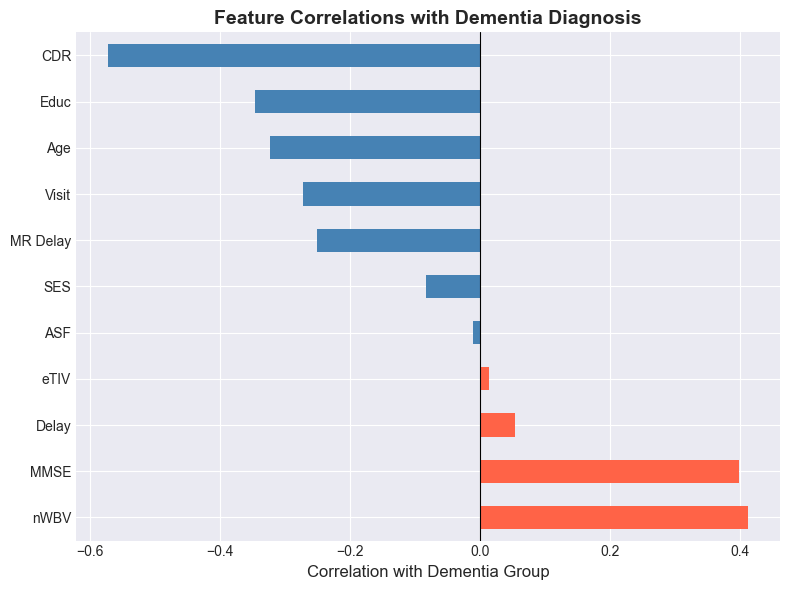

Feature correlation plot saved to: Analysis/plots\feature_correlations_with_target.png

MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
  Feature 1 Feature 2  Correlation
2      eTIV       ASF    -0.982182
3     Visit  MR Delay     0.946042
0       Age      nWBV    -0.857019
1      MMSE       CDR    -0.738680

BIVARIATE ANALYSIS - FEATURE VS DEMENTIA GROUP
Visualizing top 4 correlated features: ['CDR', 'nWBV', 'MMSE', 'Educ']


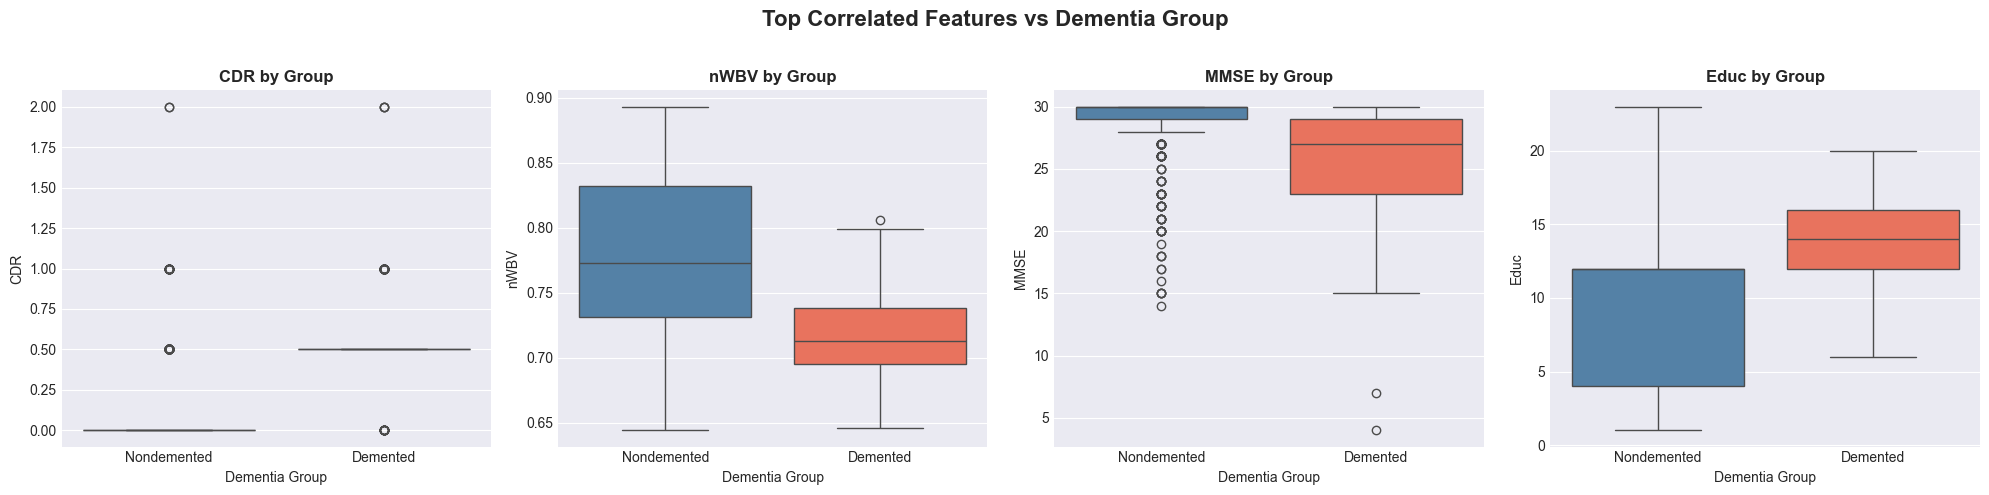

Bivariate analysis plot saved to: Analysis/plots\bivariate_analysis_boxplots.png

OUTLIER DETECTION


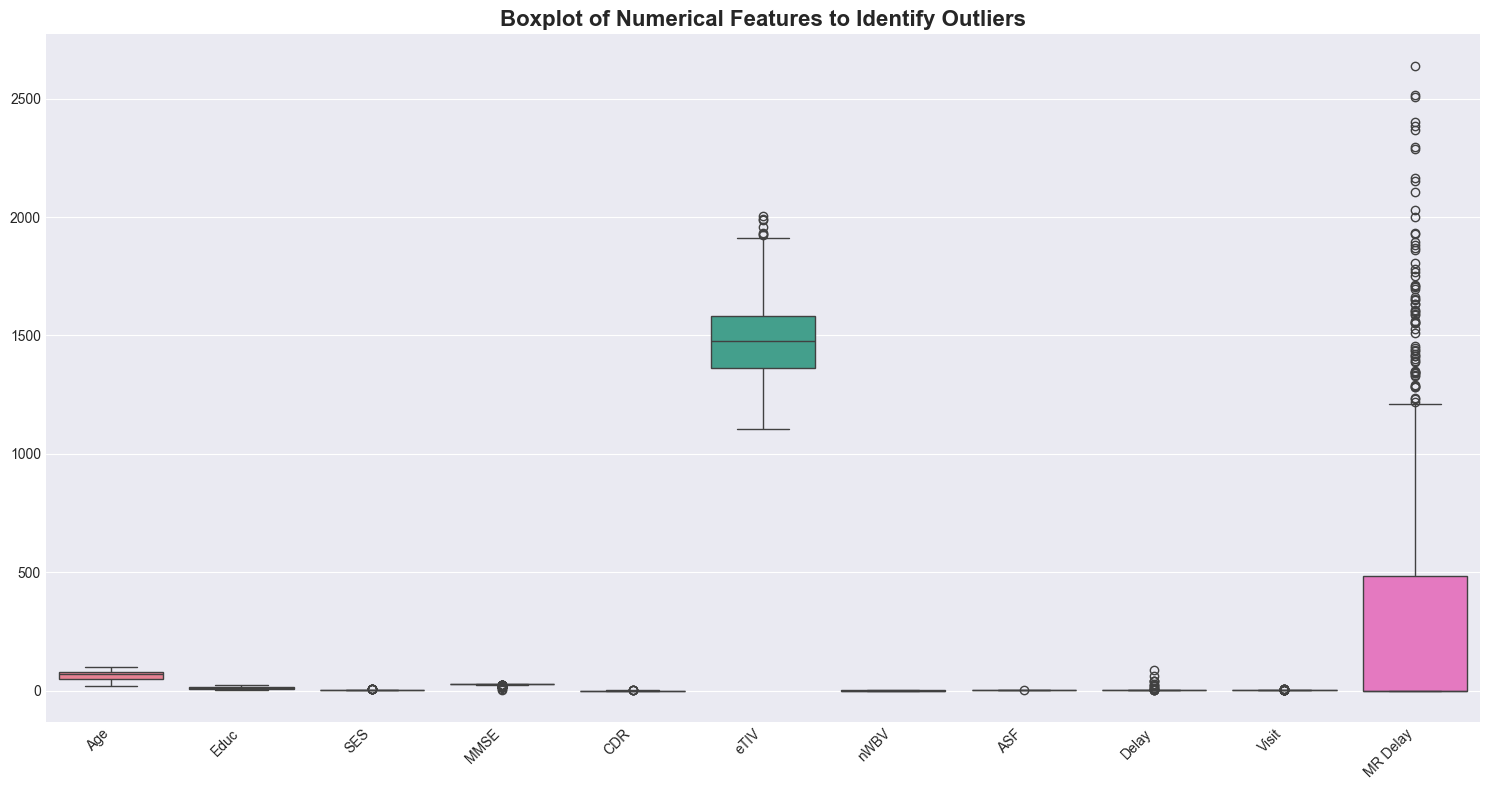

Outlier boxplot saved to: Analysis/plots\outlier_analysis_boxplot.png

Outlier Summary (IQR Method):
          count  percentage
MMSE       74.0    9.147095
MR Delay   67.0    8.281829
Visit      21.0    2.595797
Delay      17.0    2.101360
SES        10.0    1.236094
eTIV        7.0    0.865266
CDR         5.0    0.618047
ASF         1.0    0.123609

FEATURE IMPORTANCE ANALYSIS (MUTUAL INFORMATION)
Dropped identifier columns: ['ID', 'Subject ID', 'MRI ID', 'Hand']

Mutual Information Scores (higher is more important):
     Feature  MI Score
0        CDR  0.209281
1       nWBV  0.128345
2       Educ  0.100464
3       MMSE  0.090752
4      Visit  0.069326
5        Age  0.068609
6   MR Delay  0.061803
7       eTIV  0.025293
8        SES  0.022152
9        M/F  0.019525
10       ASF  0.011808
11     Delay  0.000000


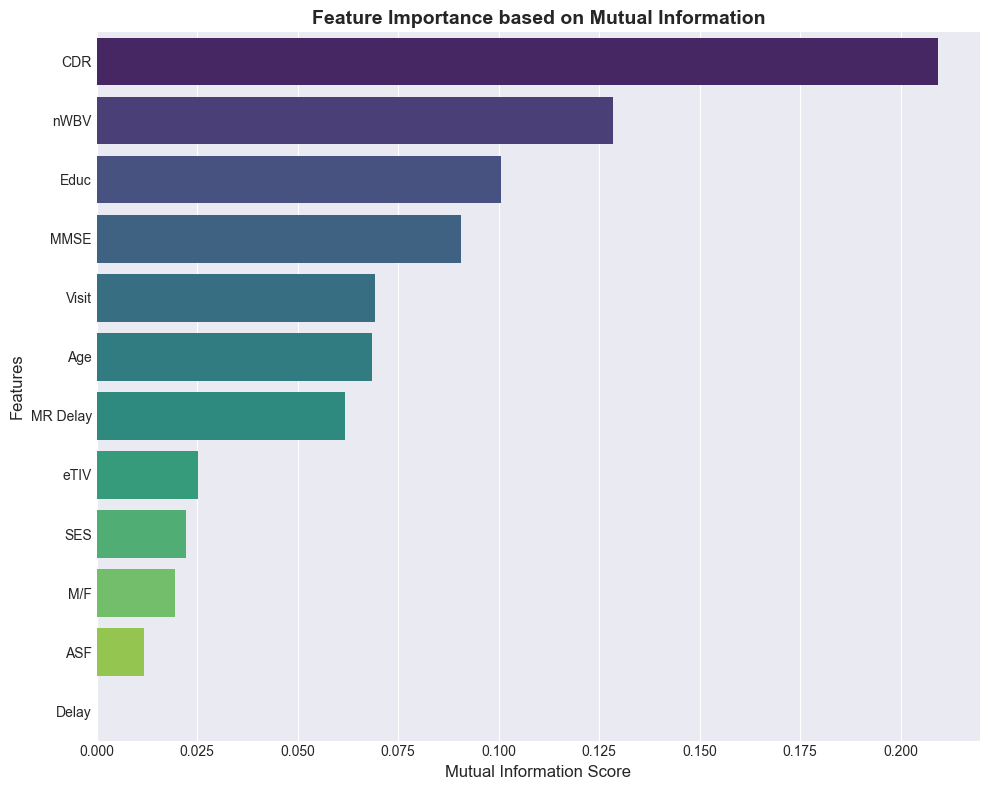

Mutual information plot saved to: Analysis/plots\mutual_information_scores.png

DIMENSIONALITY REDUCTION (PCA)


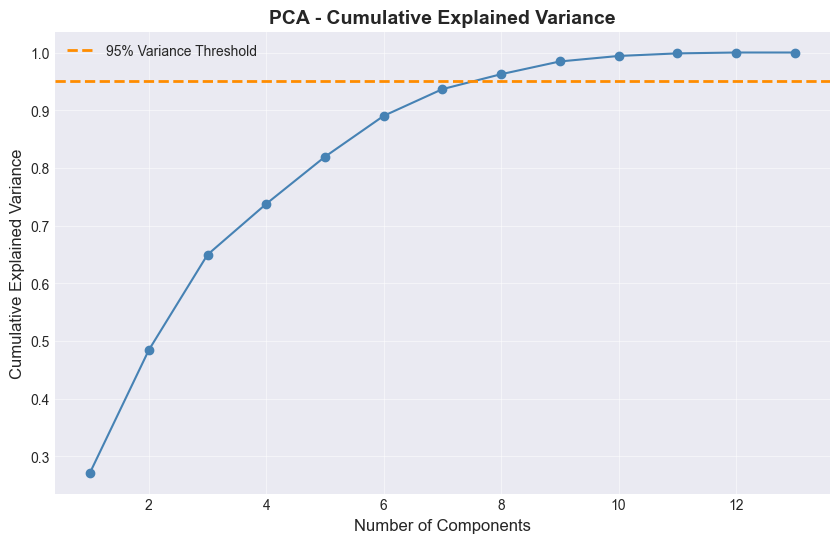


Number of components needed to explain 95% of variance: 8
PCA analysis plot saved to: Analysis/plots\pca_analysis.png

FINAL DATA SPLITTING AND SAVING
Data splitting complete:
X_train shape: (647, 12)
X_val shape: (162, 12)

y_train distribution:
Group
Nondemented    0.77
Demented       0.23
Name: proportion, dtype: float64

y_val distribution:
Group
Nondemented    0.77
Demented       0.23
Name: proportion, dtype: float64

Training and validation data have been saved to the 'Analysis/processed_data' directory.
Ready to proceed to '2_model_exploration.ipynb'.

ANALYSIS NOTEBOOK 1 COMPLETE!

Analysis summary saved to: Analysis/reports\dataset_analysis_summary.txt
All plots have been saved to the 'Analysis/plots' directory.


In [22]:
# Written by Hasib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

plots_dir = 'Analysis/plots'
reports_dir = 'Analysis/reports'
processed_data_dir = 'Analysis/processed_data'

# --- Create output directories if they don't exist ---
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)
os.makedirs(processed_data_dir, exist_ok=True)


# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
data_cross = pd.read_csv('oasis_cross-sectional.csv')
data_long = pd.read_csv('oasis_longitudinal.csv')

# Standardize column names
data_long = data_long.rename(columns={'EDUC': 'Educ'})
df = pd.concat([data_cross, data_long], ignore_index=True)
df.columns = df.columns.str.strip()


print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values Before Imputation:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])
    # --- Impute Missing Values ---
    print("\nImputing missing values with the mode...")
    for column in df.columns:
        if df[column].isnull().any():
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
    print("Missing values have been imputed.")

# Verify that there are no more missing values
print(f"\nMissing Values After Imputation: {df.isnull().sum().sum()}")


# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nBasic Statistics:")
print(df[numeric_cols].describe())

# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Create subplots for numeric features
n_numeric = len(numeric_cols)
n_rows = (n_numeric + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 4*n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    # Shorten column names for display
    short_name = col[:40] + "..." if len(col) > 40 else col
    axes[idx].set_title(f'Distribution of {short_name}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide extra subplots
for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('Analysis/plots/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness of Numeric Features:")
skewness = df[numeric_cols].skew()
print(skewness.sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS ('Group')")
print("=" * 80)

target_col = 'Group'

# --- Initial Distribution ---
print("Initial distribution of the target variable:")
print(df[target_col].value_counts())
print("-" * 40)

# --- Simplification for Binary Classification ---
# For the purpose of this binary classification task, we will merge the 'Converted'
# group into the 'Demented' group.
print("Simplifying target variable: 'Converted' will be merged into 'Demented'.")
df[target_col] = df[target_col].replace(['Converted'], ['Demented'])

# --- Final Distribution Analysis ---
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=target_col, data=df, palette=['#4682B4', '#FF6347'])
plt.title('Final Distribution of Target Variable (Group)', fontsize=14, fontweight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontweight='bold')

# Save the plot
target_dist_path = os.path.join(plots_dir, 'target_variable_distribution.png')
plt.savefig(target_dist_path, dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal distribution of the target variable:")
final_counts = df[target_col].value_counts()
print(final_counts)
print(f"\nPercentage Distribution:")
print((final_counts / len(df) * 100).round(2))
print(f"\nPlot saved to: {target_dist_path}")


# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# To calculate correlation with the categorical target, we first label-encode it.
df_corr = df.copy()
df_corr['Group_encoded'] = LabelEncoder().fit_transform(df_corr['Group'])

# Compute correlation matrix for numeric columns plus the encoded target
numeric_and_target_cols = numeric_cols.tolist() + ['Group_encoded']
correlation_matrix = df_corr[numeric_and_target_cols].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8}, annot_kws={'size': 9})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
corr_matrix_path = os.path.join(plots_dir, 'correlation_matrix.png')
plt.savefig(corr_matrix_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Correlation matrix heatmap saved to: {corr_matrix_path}")

# Top correlations with target variable
dementia_correlations = correlation_matrix['Group_encoded'].drop('Group_encoded').sort_values(ascending=False)
print("\nFeature Correlations with Dementia Group (1=Demented, 0=Nondemented):")
print(dementia_correlations)

# Visualize correlations with the dementia group
plt.figure(figsize=(8, 6))
colors = ['#FF6347' if x > 0 else '#4682B4' for x in dementia_correlations.values]
dementia_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Dementia Group', fontsize=12)
plt.title('Feature Correlations with Dementia Diagnosis', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
corr_plot_path = os.path.join(plots_dir, 'feature_correlations_with_target.png')
plt.savefig(corr_plot_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Feature correlation plot saved to: {corr_plot_path}")

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs from the original numeric correlation matrix
high_corr_pairs = []
# Use the correlation matrix of only numeric features for this
numeric_corr_matrix = df[numeric_cols].corr()
for i in range(len(numeric_corr_matrix.columns)):
    for j in range(i + 1, len(numeric_corr_matrix.columns)):
        if abs(numeric_corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': numeric_corr_matrix.columns[i],
                'Feature 2': numeric_corr_matrix.columns[j],
                'Correlation': numeric_corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False, key=abs)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")


# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS DEMENTIA GROUP
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS - FEATURE VS DEMENTIA GROUP")
print("=" * 80)

# Select top features based on the absolute correlation with the target
top_features = dementia_correlations.abs().nlargest(4).index.tolist()
print(f"Visualizing top {len(top_features)} correlated features: {top_features}")

# Create box plots for top features vs dementia group
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.boxplot(x='Group', y=feature, data=df, ax=axes[idx], palette=['#4682B4', '#FF6347'])
    axes[idx].set_title(f'{feature} by Group', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Dementia Group')
    axes[idx].set_ylabel(feature)

plt.suptitle('Top Correlated Features vs Dementia Group', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
bivariate_path = os.path.join(plots_dir, 'bivariate_analysis_boxplots.png')
plt.savefig(bivariate_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Bivariate analysis plot saved to: {bivariate_path}")


# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Visualize outliers using boxplots for all numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numerical Features to Identify Outliers', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
outlier_plot_path = os.path.join(plots_dir, 'outlier_analysis_boxplot.png')
plt.savefig(outlier_plot_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Outlier boxplot saved to: {outlier_plot_path}")

# Detect and summarize outliers using the IQR method
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outliers) > 0:
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100
        }

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).T
    outlier_df = outlier_df.sort_values('count', ascending=False)
    print("\nOutlier Summary (IQR Method):")
    print(outlier_df)
else:
    print("\nNo significant outliers detected using the IQR method.")


# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================
from sklearn.feature_selection import mutual_info_classif

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS (MUTUAL INFORMATION)")
print("=" * 80)

# --- Drop unnecessary ID columns before analysis ---
# These columns are identifiers and not useful for modeling.
# We do this here to ensure they don't leak into PCA or other analyses.
id_cols_to_drop = ['ID', 'Subject ID', 'MRI ID', 'Hand']
# Check which of these columns actually exist in the dataframe before dropping
cols_to_drop_existing = [col for col in id_cols_to_drop if col in df.columns]
if cols_to_drop_existing:
    df.drop(columns=cols_to_drop_existing, inplace=True)
    print(f"Dropped identifier columns: {cols_to_drop_existing}")

# Separate features and target
X = df.drop('Group', axis=1)
y = df['Group']

# Preprocess data for mutual information calculation
# We need to encode all features to be numerical
X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Use mutual_info_classif for a categorical target
# The target variable 'y' must also be encoded to integers for this function
y_encoded = LabelEncoder().fit_transform(y)
mi_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False).reset_index(drop=True)

print("\nMutual Information Scores (higher is more important):")
print(mi_scores_df)

# Visualize mutual information scores
plt.figure(figsize=(10, 8))
sns.barplot(y='Feature', x='MI Score', data=mi_scores_df, palette='viridis')
plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
mi_path = os.path.join(plots_dir, 'mutual_information_scores.png')
plt.savefig(mi_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Mutual information plot saved to: {mi_path}")

# =============================================================================
# 10. DIMENSIONALITY REDUCTION VISUALIZATION (PCA)
# =============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Re-define numeric_cols after dropping IDs
numeric_cols = X.select_dtypes(include=np.number).columns

# Define a preprocessor to scale numeric features and one-hot encode categoricals
# This ensures all data is numeric before PCA
preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['M/F'])
    ],
    remainder='drop' # Drop any other columns (none should be left)
)

# Apply preprocessing and PCA
X_processed = preprocessor_pca.fit_transform(X)
pca = PCA().fit(X_processed)

# Explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', color='steelblue')
plt.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance Threshold')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA - Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.5)
pca_path = os.path.join(plots_dir, 'pca_analysis.png')
plt.savefig(pca_path, dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95}")
print(f"PCA analysis plot saved to: {pca_path}")


# =============================================================================
# 11. FINAL DATA SPLITTING AND SAVING
# =============================================================================
import joblib

print("\n" + "=" * 80)
print("FINAL DATA SPLITTING AND SAVING")
print("=" * 80)

# Separate features (X) and target (y) from the cleaned dataframe
# Note: X is already defined from the Mutual Information step
y = df['Group']

# Split data into training (80%) and validation (20%) sets
# Use stratify to maintain the same class distribution in train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data splitting complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"\ny_train distribution:\n{y_train.value_counts(normalize=True).round(2)}")
print(f"\ny_val distribution:\n{y_val.value_counts(normalize=True).round(2)}")

# --- Save Processed Data for Next Notebook ---
# Save the split dataframes to be used in the model exploration notebook
joblib.dump(X_train, os.path.join(processed_data_dir, 'X_train.joblib'))
joblib.dump(X_val, os.path.join(processed_data_dir, 'X_val.joblib'))
joblib.dump(y_train, os.path.join(processed_data_dir, 'y_train.joblib'))
joblib.dump(y_val, os.path.join(processed_data_dir, 'y_val.joblib'))

print(f"\nTraining and validation data have been saved to the '{processed_data_dir}' directory.")
print("Ready to proceed to '2_model_exploration.ipynb'.")




# =============================================================================
# 12. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report string
summary_report = f"""
DEMENTIA DATASET ANALYSIS SUMMARY
======================================

1. Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features (after cleaning): {df.shape[1]}
- Numeric Features: {len(numeric_cols)}
- Categorical Features: {len(df.select_dtypes(include='object').columns)}
- Missing Values Handled: Yes
- Duplicate Rows Found: {duplicates}

2. Target Variable ('Group'):
- Final Classes: {list(final_counts.index)}
- Distribution: {final_counts.to_dict()}
- Imbalance: The dataset is imbalanced, with more 'Nondemented' cases. This justifies using SMOTE in the modeling phase.

3. Key Findings from Correlation Analysis:
- Most positively correlated with dementia: '{dementia_correlations.index[0]}' (Corr: {dementia_correlations.iloc[0]:.2f})
- Most negatively correlated with dementia: '{dementia_correlations.index[-1]}' (Corr: {dementia_correlations.iloc[-1]:.2f})

4. Key Findings from Feature Importance (Mutual Information):
- Most important feature: '{mi_scores_df.loc[0, "Feature"]}' (MI Score: {mi_scores_df.loc[0, "MI Score"]:.3f})
- Second most important feature: '{mi_scores_df.loc[1, "Feature"]}' (MI Score: {mi_scores_df.loc[1, "MI Score"]:.3f})

5. Dimensionality and Outliers:
- PCA: {n_components_95} components are needed to explain 95% of the variance.
- Outliers: Outliers were detected, particularly in 'SES'. Tree-based models will be robust to this.

6. Preprocessing Recommendations for Modeling:
- Scaling: StandardScaler will be applied to numeric features.
- Encoding: OneHotEncoder will be applied to categorical features.
- Imbalance: SMOTE will be used to balance the training data.
- Feature Selection: All features will be retained initially, as ensemble models can handle feature importance internally.
"""

# Save summary to file
summary_path = os.path.join(reports_dir, 'dataset_analysis_summary.txt')
with open(summary_path, 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS NOTEBOOK 1 COMPLETE!")
print("=" * 80)
print(f"\nAnalysis summary saved to: {summary_path}")
print("All plots have been saved to the 'Analysis/plots' directory.")
